In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path='/Users/user/Desktop/python projects/games_dataset.csv'
games_df=pd.read_csv(file_path)

print(games_df.head())


                      Game Name       Genre         Platform  Release Year  \
0     Sekiro: Shadows Die Twice      Sports  Nintendo Switch          2014   
1                       Control      Puzzle  Nintendo Switch          2000   
2                      Among Us    Strategy  Nintendo Switch          2007   
3  Call of Duty: Modern Warfare     Stealth      PlayStation          2005   
4             League of Legends  Simulation               PC          2021   

   User Rating  
0     9.654719  
1     3.457386  
2     5.367622  
3     1.240325  
4     3.535476  


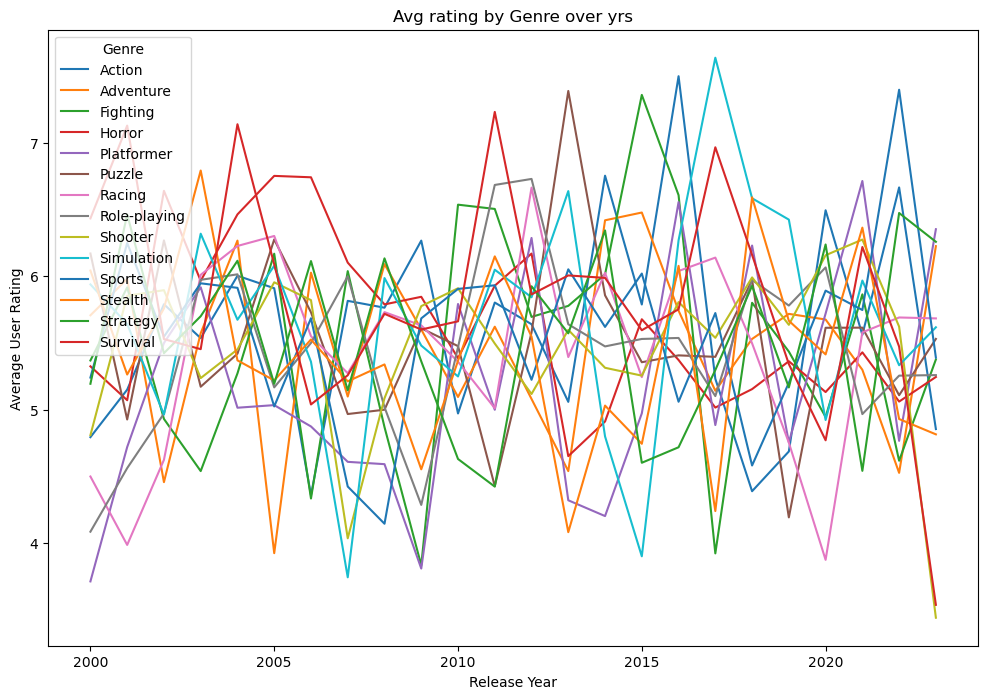

In [7]:
# 1. How has the average user rating for each genre evolved over the years?

genre_rating = games_df.groupby(['Release Year', 'Genre'])['User Rating'].mean().unstack()
genre_rating.plot(figsize=(12,8), title='Avg rating by Genre over yrs')
plt.ylabel('Average User Rating')
plt.show()

In [17]:
# 2. What are the most successful platforms for each genre in terms of average user rating?

platform_rating=games_df.groupby(['Platform','Genre'])['User Rating'].mean().unstack()
top_platform_genre=platform_rating.idxmax()
top_platform_rating=platform_rating.max()


print("Top platform by genre:", top_platform_genre)
print("Top platform ratings by genre:", top_platform_rating)

Top platform by genre: Genre
Action          Nintendo Switch
Adventure       Nintendo Switch
Fighting                     PC
Horror              PlayStation
Platformer               Mobile
Puzzle                     Xbox
Racing              PlayStation
Role-playing               Xbox
Shooter                      PC
Simulation          PlayStation
Sports                       PC
Stealth                    Xbox
Strategy                     PC
Survival                     PC
dtype: object
Top platform ratings by genre: Genre
Action          5.918795
Adventure       5.756638
Fighting        6.008673
Horror          5.976318
Platformer      5.765296
Puzzle          5.602919
Racing          5.675422
Role-playing    5.703183
Shooter         5.984560
Simulation      5.861521
Sports          5.749607
Stealth         5.903504
Strategy        5.988218
Survival        6.020247
dtype: float64


In [19]:
# 3 Find the games with the highest and lowest user ratings
highest_rated_games = games_df[games_df['User Rating'] == games_df['User Rating'].max()]
lowest_rated_games = games_df[games_df['User Rating'] == games_df['User Rating'].min()]
highest_rated_games, lowest_rated_games



(     Game Name         Genre Platform  Release Year  User Rating
 2627  NBA 2K21  Role-playing     Xbox          2004     9.996196,
                   Game Name   Genre Platform  Release Year  User Rating
 1273  Monster Hunter: World  Puzzle       PC          2006     1.005878)

Top 5 genres with the highest average user ratings:
Genre
Survival      5.831934
Horror        5.629845
Simulation    5.626343
Action        5.603556
Sports        5.561171
Name: User Rating, dtype: float64


<Figure size 1200x800 with 0 Axes>

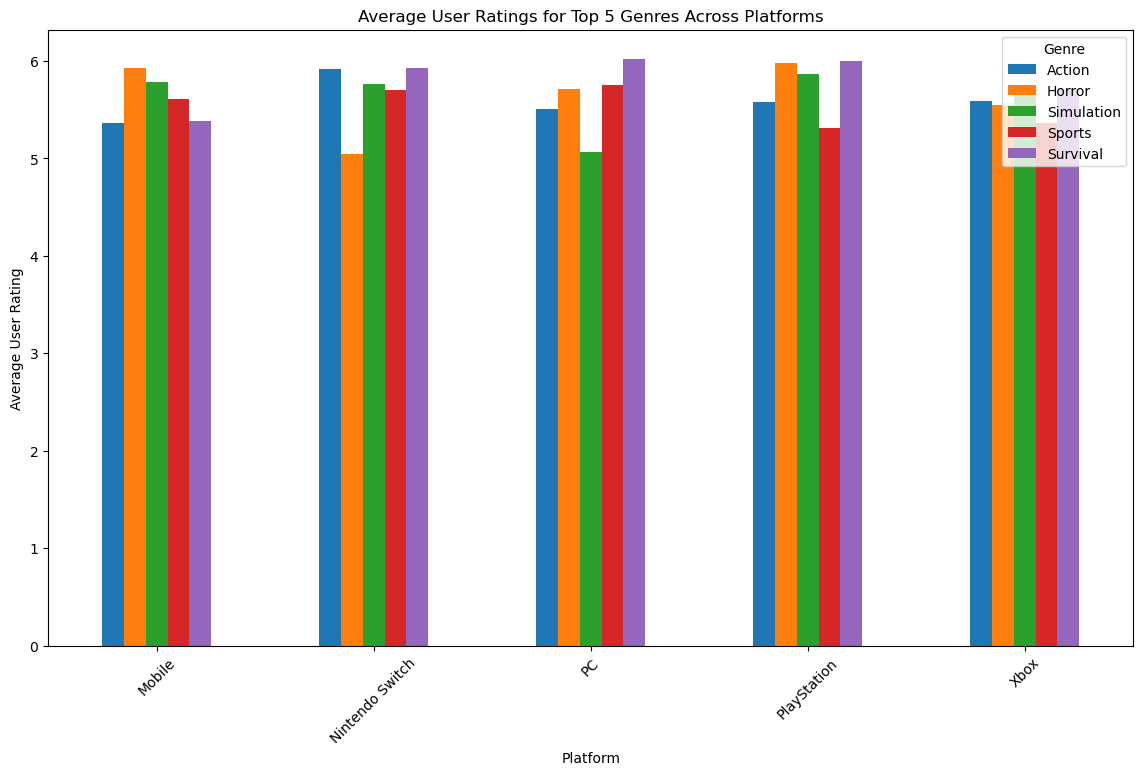

In [23]:
#4 What are the top 5 genres that have the highest average user ratings, and how do these ratings compare across different platforms?

# Calculate the average user rating for each genre
average_rating_by_genre = games_df.groupby('Genre')['User Rating'].mean()

# Identify the top 5 genres with the highest average user ratings
top_5_genres = average_rating_by_genre.nlargest(5)
print("Top 5 genres with the highest average user ratings:")
print(top_5_genres)

# Filter the dataset to include only the top 5 genres
top_5_genres_df = games_df[games_df['Genre'].isin(top_5_genres.index)]

# Calculate the average user rating for each platform within these top 5 genres
platform_genre_ratings = top_5_genres_df.groupby(['Platform', 'Genre'])['User Rating'].mean().unstack()

# Visualize the ratings of the top 5 genres across different platforms
plt.figure(figsize=(12, 8))
platform_genre_ratings.plot(kind='bar', figsize=(14, 8), title='Average User Ratings for Top 5 Genres Across Platforms')
plt.ylabel('Average User Rating')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.show()


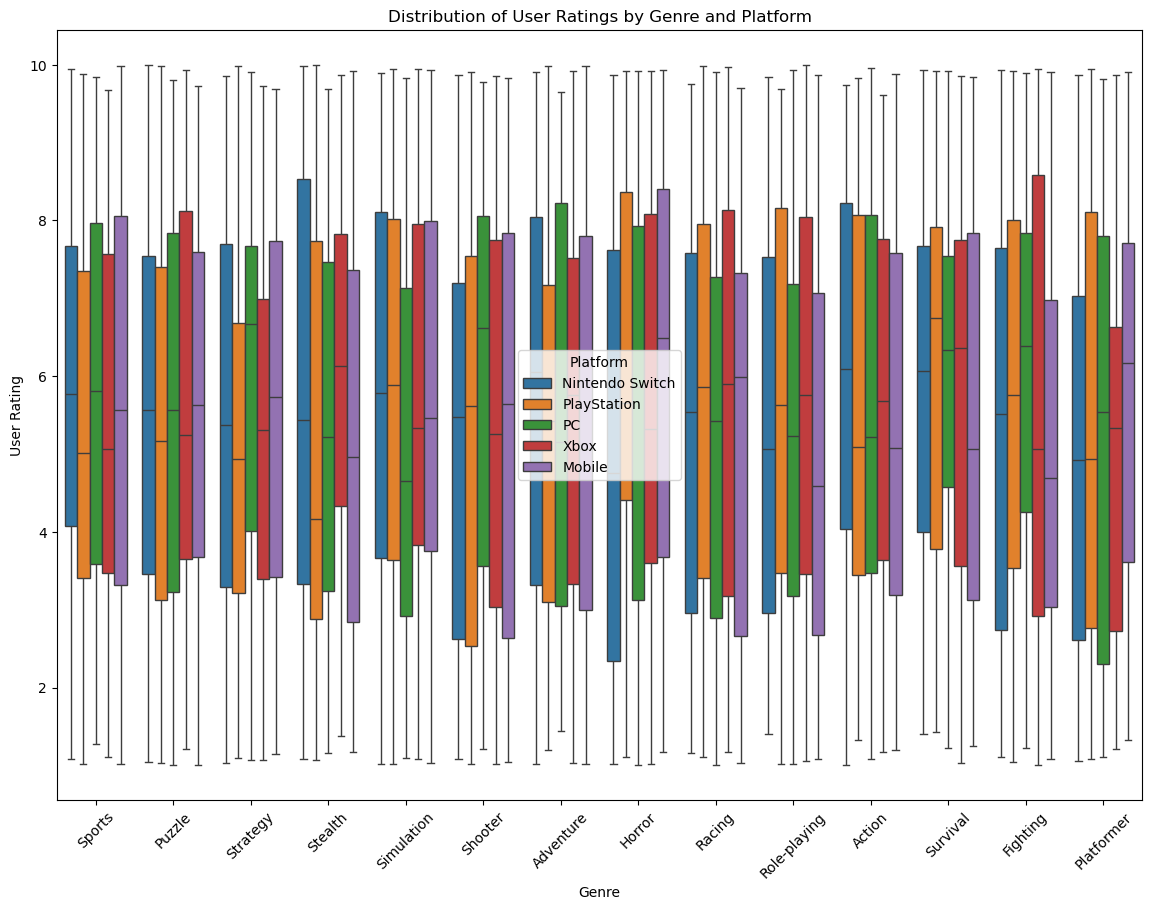

In [33]:
# 5. What is the distribution of user ratings across different genres and platforms?
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genre', y='User Rating', hue='Platform', data=games_df)
plt.title('Distribution of User Ratings by Genre and Platform')
plt.xticks(rotation=45)
plt.show()

In [35]:
# 6. Which platforms have the highest variance in user ratings across all games, and what might this indicate?

platform_with_highest_variance=games_df.groupby('Platform')['User Rating'].var().sort_values(ascending=False)
print("Platform rating variance:", platform_with_highest_variance)

Platform rating variance: Platform
Nintendo Switch    6.963917
Mobile             6.771872
PlayStation        6.756939
Xbox               6.686259
PC                 6.606086
Name: User Rating, dtype: float64


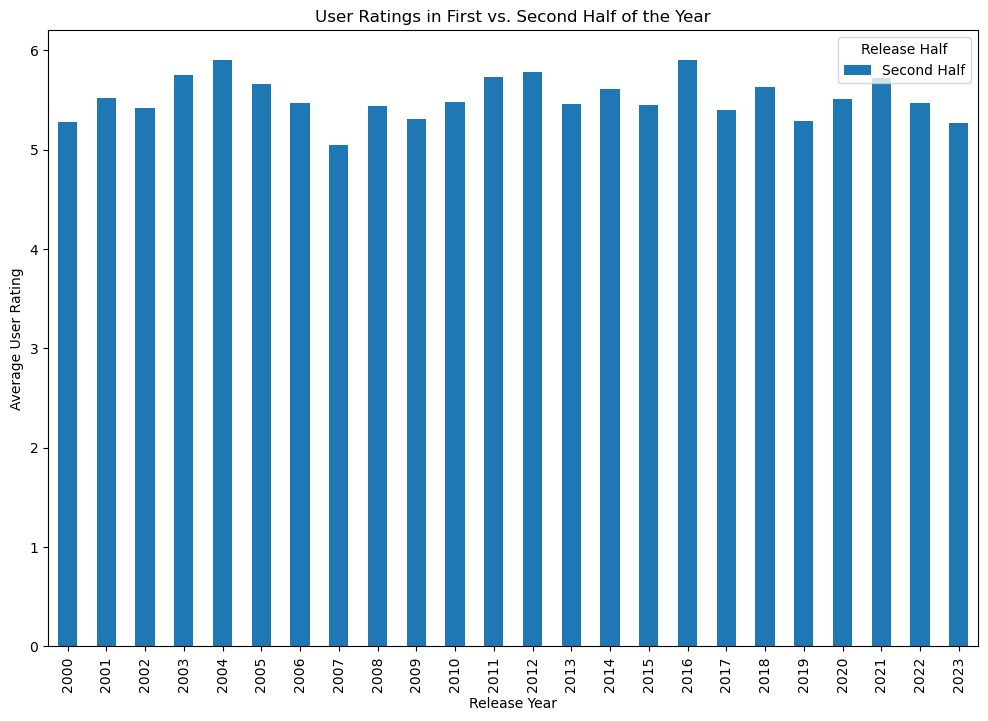

In [43]:
# 7. Are there any significant differences in user ratings between games released in the first half and the second half of each year?


games_df['Release Half'] = games_df['Release Year'].apply(lambda x: 'First Half' if x <= 6 else 'Second Half')
half_year_rating_comparison = games_df.groupby(['Release Year', 'Release Half'])['User Rating'].mean().unstack()
half_year_rating_comparison.plot(kind='bar', figsize=(12, 8), title='User Ratings in First vs. Second Half of the Year')
plt.ylabel('Average User Rating')
plt.show()

Genres with the most consistent user ratings:
Genre
Survival    2.487395
Strategy    2.523541
Puzzle      2.554090
Action      2.556635
Sports      2.560038
Name: User Rating, dtype: float64


<Figure size 1200x800 with 0 Axes>

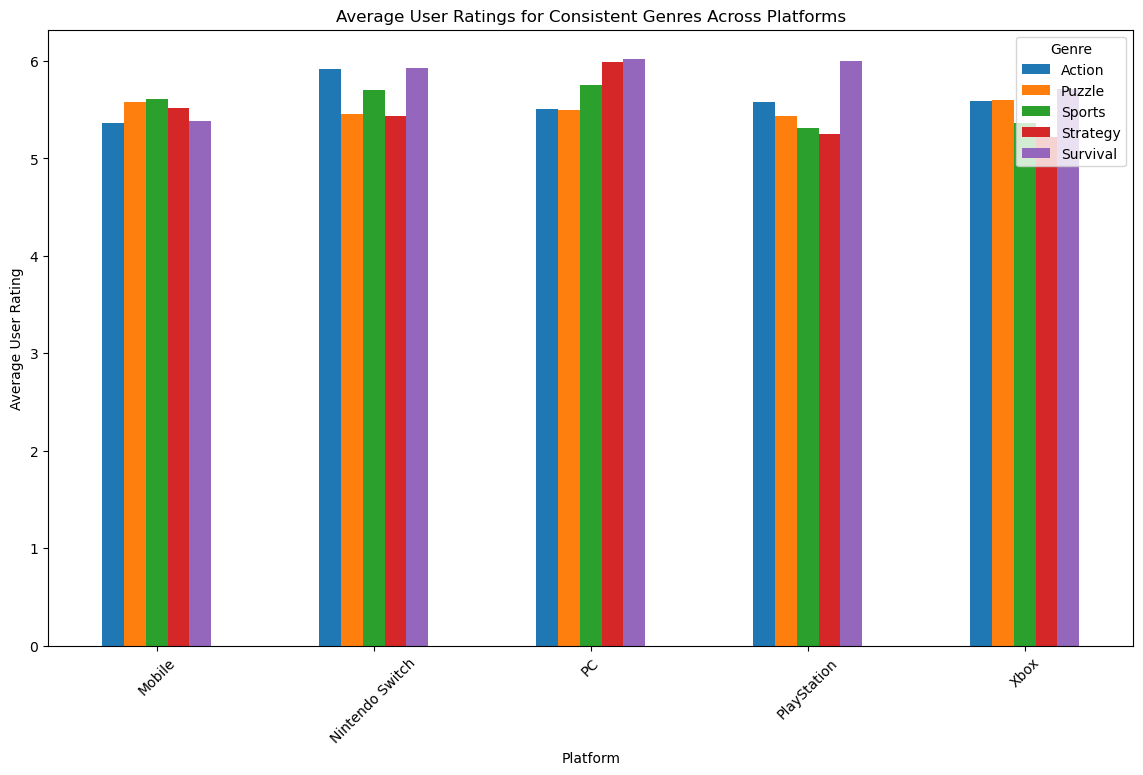

In [45]:
#8. Which genres have the most consistent user ratings, and how do these consistent ratings compare across platforms?

# Calculate the standard deviation of user ratings for each genre
rating_variance_by_genre = games_df.groupby('Genre')['User Rating'].std()

# Identify the top 5 genres with the least variation (most consistent ratings)
most_consistent_genres = rating_variance_by_genre.nsmallest(5)
print("Genres with the most consistent user ratings:")
print(most_consistent_genres)

# Filter the dataset to include only the most consistent genres
consistent_genres_df = games_df[games_df['Genre'].isin(most_consistent_genres.index)]

# Calculate the average user rating for each platform within these consistent genres
consistent_platform_genre_ratings = consistent_genres_df.groupby(['Platform', 'Genre'])['User Rating'].mean().unstack()

# Visualize the comparison
plt.figure(figsize=(12, 8))
consistent_platform_genre_ratings.plot(kind='bar', figsize=(14, 8), title='Average User Ratings for Consistent Genres Across Platforms')
plt.ylabel('Average User Rating')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

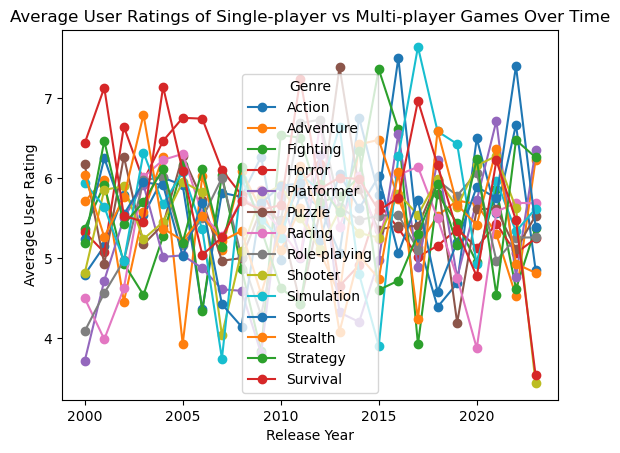

In [49]:
#9. How do the average user ratings of single-player games compare to multi-player games over the years?

avg_rating_by_game_type = games_df.groupby(['Release Year', 'Genre'])['User Rating'].mean().unstack()

# Visualize the comparison over time
plt.figure(figsize=(10, 6))
avg_rating_by_game_type.plot(kind='line', marker='o', title='Average User Ratings of Single-player vs Multi-player Games Over Time')
plt.ylabel('Average User Rating')
plt.xlabel('Release Year')
plt.show()

In [51]:
#10. What percentage of games on each platform have above-average user ratings, and which platform has the highest proportion of highly rated games?

# Calculate the overall average user rating across all games
overall_average_rating = games_df['User Rating'].mean()

# Calculate the percentage of games on each platform that have above-average user ratings
platform_above_average = games_df.groupby('Platform').apply(lambda x: (x['User Rating'] > overall_average_rating).mean() * 100)

# Identify the platform with the highest proportion of above-average rated games
top_platform_by_percentage = platform_above_average.idxmax()
top_percentage = platform_above_average.max()

# Display the results
print(f"Overall average user rating across all games: {overall_average_rating:.2f}")
print("\nPercentage of above-average rated games by platform:")
print(platform_above_average)

print(f"\nPlatform with the highest proportion of above-average rated games: {top_platform_by_percentage}")
print(f"Highest proportion of above-average rated games: {top_percentage:.2f}%")


Overall average user rating across all games: 5.52

Percentage of above-average rated games by platform:
Platform
Mobile             49.188641
Nintendo Switch    50.353893
PC                 53.314394
PlayStation        49.583333
Xbox               49.752230
dtype: float64

Platform with the highest proportion of above-average rated games: PC
Highest proportion of above-average rated games: 53.31%


C:\Users\user\AppData\Local\Temp\ipykernel_12188\1760149357.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  platform_above_average = games_df.groupby('Platform').apply(lambda x: (x['User Rating'] > overall_average_rating).mean() * 100)
